In [1]:
foo <- read.csv("https://tinyurl.com/yb4phxx8") # read in the data

In [3]:
# column names
names(foo)

# dimensions of the data set
dim(foo)

# quick look at the data structure
head(foo)

# one thing to be very careful with (in this data set) is the use of dates. 8 columns involve dates.

# take note of the columns representing calendar dates
date.columns <- c(11, 12, 14, 15, 16, 17, 18, 25)

# these columns need some tweaking--I want to address missing values, calling the blank (empty) 
# elements "NA" instead of leaving them blank, and I wish to tell R these are "Date" objects.


[1] "Number"                  "Status"                 
 [3] "Cluster"                 "Prefix"                 
 [5] "Type"                    "Country"                
 [7] "Dept"                    "Division"               
 [9] "LTAA"                    "Loan"                   
[11] "ApprovalDate"            "AgreementDate"          
[13] "Agreement"               "EffectivityDate"        
[15] "CancellationDate"        "FinancialCompletionDate"
[17] "OriginalCompletionDate"  "RevisedCompletionDate"  
[19] "JSF"                     "Fund"                   
[21] "RevisedAmount"           "Rating"                 
[23] "No"                      "PCR"                    
[25] "CirculationDate"

[1] 9016   25

Number,Status,Cluster,Prefix,Type,Country,Dept,Division,LTAA,Loan,...,FinancialCompletionDate,OriginalCompletionDate,RevisedCompletionDate,JSF,Fund,RevisedAmount,Rating,No,PCR,CirculationDate
5001,Financially Completed,,R,RETA,REG,,,"Agriculture, natural resources and rural development",0,...,1987-12-31,,1987-12-31,NA,2,0.155,NA,,,
1,Financially Completed,,,ADTA,INO,,,"Agriculture, natural resources and rural development",0,...,1968-07-31,,1968-07-31,NA,2,0.080,NA,,,
2,Financially Completed,,,ADTA,KOR,,,"Agriculture, natural resources and rural development",0,...,1969-10-31,,1969-10-31,NA,2,0.067,NA,,,
3,Financially Completed,,,ADTA,PHI,,,"Agriculture, natural resources and rural development",0,...,1970-01-31,,1970-01-31,NA,2,0.105,NA,,,
4,Financially Completed,,,ADTA,VIE,,,Finance,0,...,1972-08-31,,1972-08-31,NA,2,0.115,NA,,,
5,Financially Completed,,,PPTA,PHI,,,Transport,0,...,1970-03-31,,1970-03-31,NA,2,0.325,NA,,,


In [4]:
for(i in date.columns)  # this "for loop" only loops through the "date.columns" -- no other columns.
  
{
  
  # identify which values are missing in the "i"th column of the foo data set
  which_values_are_missing <- which(as.character(foo[, i]) == "")
  
  # those values that are missing (blank) in the "i"th column are replaced by <NA>
  # because R knows how to handle "NA" -- NA means something special in R--blanks are handled 
  # more unpredictably (which is bad).
  foo[which_values_are_missing, i] <- NA
  
  # last step--replace each of these columns (which is structured as a column of "factor" values)
  # as a column of dates--i.e., convert them to an object of "class" = Date. They are dates, after all.
  # And if you convert them to the Date class, R will know they are dates and you can manipulate 
  # dates in a simple, straightforward way. Otherwise, you won't be able to easily manipulate them
  # arithmetically.  E.g., for simple Date operations, see lines 48-58 below...
  # **By the way, if you don't understand what a "factor" is in R, you should Google it.** 
  foo[, i] <- as.Date(as.character(foo[, i]))
  
}

In [5]:
# Now R knows that these columns are comprised of dates
# for example...  Replicate this yourself...

# foo[3,12]
# [1] "1968-03-13"

# foo[4,12]
# [1] "1968-07-03"

# foo[3,12] - foo[4,12]
# Time difference of -112 days

# Also, one additional helpful hint... How to eliminate rows with NAs...
# The "is.na" function--for more info, Google it or type ?is.na at the R command prompt in the console.
#which.have.NAs <- which(is.na(foo$Rating == TRUE)) # for which rows is the claim "is.na" a TRUE claim?


In [6]:
# Then, if you wanted to, e.g., remove all those rows, retaining only the rows with ratings...
#new_foo <- foo[-which.have.NAs ]
library(dplyr)
new_foo<-mutate(foo)
which.have.NAs <- which(is.na(new_foo$CirculationDate == TRUE))
new_foo<-new_foo[-which.have.NAs,]
to_be_excluded <- which(new_foo$CirculationDate < as.Date("2008-01-01"))
new_foo<-new_foo[-to_be_excluded,]
new_foo[,"Difference_between_OriginalCompletionDate and ApprovalDate"]<-(new_foo$OriginalCompletionDate-new_foo$ApprovalDate)/365
new_foo[,"ChangeofProjectDuration"]<-(new_foo$RevisedCompletionDate-new_foo$ApprovalDate)/365

quantile(new_foo$ChangeofProjectDuration)
mean(new_foo$ChangeofProjectDuration)
median(new_foo$ChangeofProjectDuration)
t.test(new_foo$ChangeofProjectDuration)
new_foo_1<-mutate(new_foo)
which.have.NAs <- which(is.na(new_foo_1$`Difference_between_OriginalCompletionDate and ApprovalDate` == TRUE))
new_foo_1<-new_foo_1[-which.have.NAs,]
mean(new_foo_1$`Difference_between_OriginalCompletionDate and ApprovalDate`)
quantile(new_foo_1$`Difference_between_OriginalCompletionDate and ApprovalDate`)
median(new_foo_1$`Difference_between_OriginalCompletionDate and ApprovalDate`)
t.test(new_foo_1$`Difference_between_OriginalCompletionDate and ApprovalDate`)

t.test(new_foo_1$`Difference_between_OriginalCompletionDate and ApprovalDate`,new_foo$ChangeofProjectDuration)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Time differences in days
        0%        25%        50%        75%       100% 
 0.1534247  2.3013699  3.0657534  4.0493151 12.0410959 

Time difference of 3.331156 days

Time difference of 3.065753 days


	One Sample t-test

data:  new_foo$ChangeofProjectDuration
t = 95.291 days, df = 1873, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 3.262596 days 3.399716 days
sample estimates:
Time difference of 3.331156 days


Time difference of 1.763751 days

Time differences in days
        0%        25%        50%        75%       100% 
0.04931507 1.09315068 1.62191781 2.14520548 9.23013699 

Time difference of 1.621918 days


	One Sample t-test

data:  new_foo_1$`Difference_between_OriginalCompletionDate and ApprovalDate`
t = 84.716 days, df = 1852, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 1.722918 days 1.804583 days
sample estimates:
Time difference of 1.763751 days



	Welch Two Sample t-test

data:  new_foo_1$`Difference_between_OriginalCompletionDate and ApprovalDate` and new_foo$ChangeofProjectDuration
t = -38.523 days, df = 3049.4, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.647183 days -1.487627 days
sample estimates:
Time differences in days
mean of x mean of y 
 1.763751  3.331156 


[1] 543  27

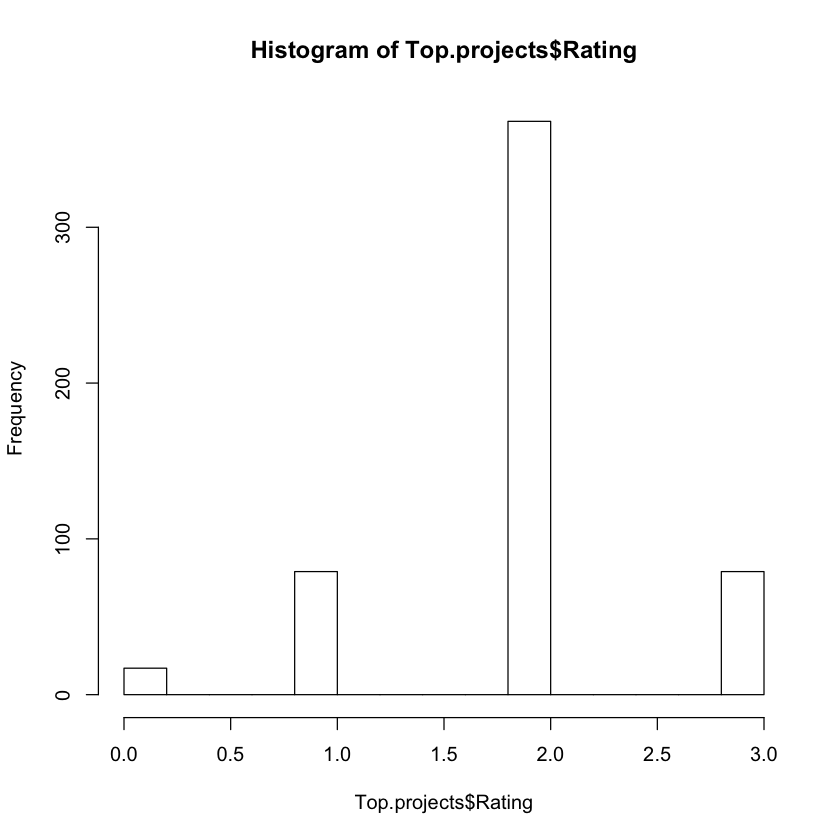

In [9]:
count3 <- length(which(new_foo$Rating== 3 ))
count1<-length(which(new_foo$Rating== 1 ))
count2<-length(which(new_foo$Rating== 2))

Total_Ratings_count<-sum(count1,count2,count3)
percentage_of_Rating_1<-round(count1*100/Total_Ratings_count,digits = 0)
percentage_of_Rating_2<-round(count2*100/Total_Ratings_count,digits=0)
percentage_of_Rating_3<-round(count3*100/Total_Ratings_count,digits=0)
new_foo.Rating_per_count<-data.frame(count1,count2,count3)
new_foo.Rating_per_count<-rbind(new_foo.Rating_per_count,"Percentage"=c(percentage_of_Rating_1,percentage_of_Rating_2,percentage_of_Rating_3))

New_foo_3<-mutate(new_foo)
No_PPT <- which(New_foo_3$Type=="PPTA")
New_foo_3<-New_foo_3[-No_PPT,]
count3.1 <- length(which(New_foo_3$Rating== 3 ))
count1.1<-length(which(New_foo_3$Rating== 1 ))
count2.1<-length(which(New_foo_3$Rating== 2))

Total_Ratings_count_1<-sum(count1.1,count2.1,count3.1)
percentage_of_Rating_1.1<-round(count1.1*100/Total_Ratings_count_1,digits = 0)
percentage_of_Rating_2.1<-round(count2.1*100/Total_Ratings_count_1, digits = 0)
percentage_of_Rating_3.1<-round(count3.1*100/Total_Ratings_count_1,digits = 0)
new_foo.Rating_per_count_1<-data.frame(count1.1,count2.1,count3.1)
new_foo.Rating_per_count_1<-rbind(new_foo.Rating_per_count_1,"Percentage"=c(percentage_of_Rating_1.1,percentage_of_Rating_2.1,percentage_of_Rating_3.1))

new_foo_4<-mutate(new_foo)
which.top <- which(new_foo_4$RevisedAmount >= 1)
Top.projects <- new_foo_4[which.top,]
dim(Top.projects)
hist(Top.projects$Rating)


[1] 533  27

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


ERROR: Error in summary(Bottom.projects): object 'Bottom.projects' not found


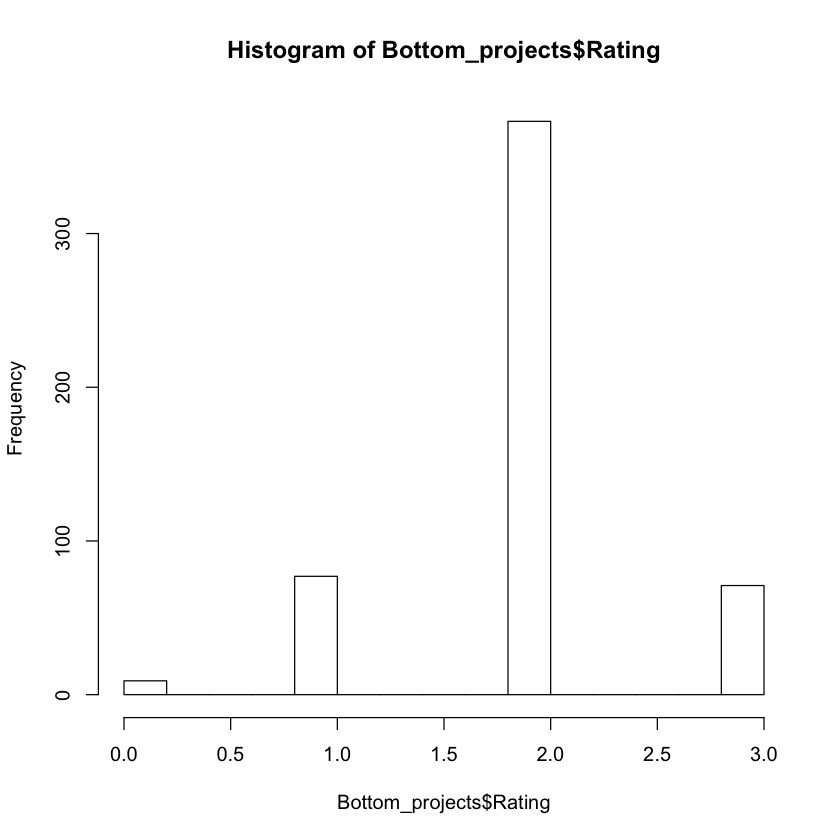

In [10]:
which.bottom <- which(new_foo_4$RevisedAmount <= .4)
Bottom_projects <- new_foo_4[which.bottom,]
dim(Bottom_projects)
hist(Bottom_projects$Rating)
library(ggplot2)
summary(Bottom.projects)
summary(Top.projects$RevisedAmount)
summary(Bottom.projects$RevisedAmount)
summary(Top.projects$Rating)
summary(Bottom.projects$Rating)